<a href="https://colab.research.google.com/github/akhil1729/Python-Projects/blob/main/602_Week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Set 3

## Preparation

In [ ]:
import pandas as pd
import numpy as np

### Import data

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
!mkdir -p datashim
!cp /content/drive/Shareddrives/DS602-F22/Data/data602.py ./datashim
from datashim import data602

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
wdf = data602.read_weather()

# Question 1 -- Statistical data visualization (25 pts)
In the first assignment, problem 3, you identified an ``interesting'' pattern in the weather or citations dataset.  Recall that discovered knowledge should be novel, useful, and non-trivial.  Develop a explanatory visualization to present the knowledge you discovered.  (You may choose a different pattern from the one you used in the first homework assignment if you wish.)

# Inorder to find the interesting patterns among the attributes in weather dataset, let's design a correlation matrix considering all the attributes

In [ ]:
wdf

,date,wnd_speed,tmp_meas,precip,precip_intensity,cloudcover,tstorm,winter,mist,fog
0,2015-12-31 19:54:00-05:00,1.5,7.2,0.0,0,4.0,0,0,0,0
1,2015-12-31 20:54:00-05:00,3.1,6.1,0.0,0,4.0,0,0,0,0
2,2015-12-31 21:54:00-05:00,2.1,6.7,0.0,0,4.0,0,0,0,0
3,2015-12-31 22:54:00-05:00,2.6,6.1,0.0,0,4.0,0,0,0,0
4,2015-12-31 23:54:00-05:00,2.1,5.6,0.0,0,4.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
67198,2023-09-01 15:54:00-04:00,1.5,26.7,0.0,0,1.0,0,0,0,0
67199,2023-09-01 16:54:00-04:00,4.6,26.7,0.0,0,1.0,0,0,0,0
67200,2023-09-01 17:54:00-04:00,3.6,26.1,0.0,0,1.0,0,0,0,0
67201,2023-09-01 18:54:00-04:00,3.6,24.4,0.0,0,1.0,0,0,0,0


In [ ]:
#pattern to relate rainfall conditions(precip_intensity) and weather status(cloud cover, mist etc)
status = ['wnd_speed', 'tmp_meas', 'precip', 'precip_intensity', 'cloudcover', 'tstorm', 'winter', 'mist', 'fog']
correlation_matrix = wdf[status].corr()

print(correlation_matrix)

                  wnd_speed  tmp_meas    precip  precip_intensity  cloudcover  \
wnd_speed          1.000000 -0.009611  0.048751          0.095523    0.072266   
tmp_meas          -0.009611  1.000000  0.009901         -0.088963    0.052962   
precip             0.048751  0.009901  1.000000          0.485936    0.138785   
precip_intensity   0.095523 -0.088963  0.485936          1.000000    0.314528   
cloudcover         0.072266  0.052962  0.138785          0.314528    1.000000   
tstorm             0.033721  0.066363  0.353175          0.144162    0.053787   
winter             0.043734 -0.142991  0.048753          0.330826    0.110282   
mist              -0.010314 -0.093884  0.280862          0.554885    0.305952   
fog               -0.046064 -0.026563  0.064870          0.086860    0.125482   

                    tstorm    winter      mist       fog  
wnd_speed         0.033721  0.043734 -0.010314 -0.046064  
tmp_meas          0.066363 -0.142991 -0.093884 -0.026563  
precip      

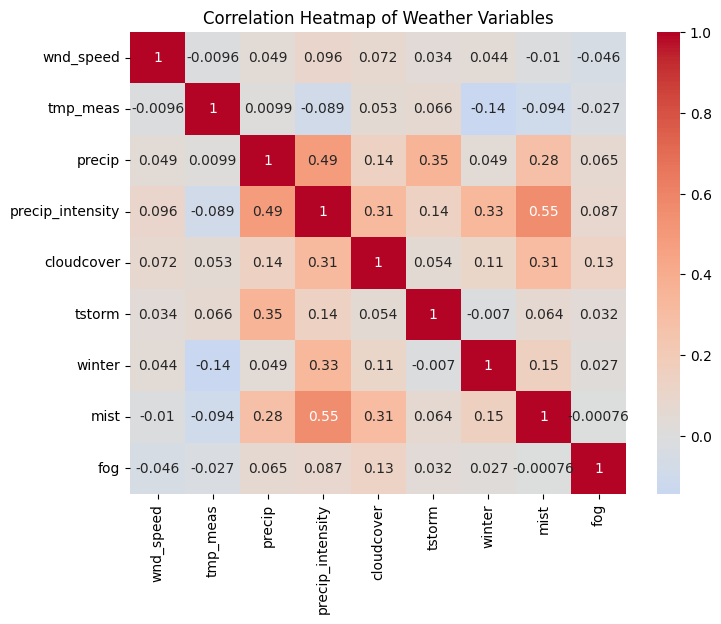

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# Add title
plt.title('Correlation Heatmap of Weather Variables')
plt.show()

Key Findings from the Heatmap:

1. Precipitation and Intensity:

precip (precipitation) and precip_intensity (precipitation intensity) have a strong positive correlation (0.49), as expected. Higher levels of precipitation are generally associated with higher precipitation intensity.

2. Precipitation and Cloud Cover:

precip and cloudcover show a moderate positive correlation (0.14). This suggests that increased cloud cover is often associated with higher precipitation.

3. Precipitation Intensity and Cloud Cover:

precip_intensity and cloudcover have a stronger positive correlation (0.31) compared to the correlation between precip and cloudcover. This indicates that higher precipitation intensity is more closely linked to increased cloud cover.

4. Temperature and Precipitation:

tmp_meas (temperature) and precip have a very weak correlation (-0.0096). This suggests that there's little to no relationship between temperature and precipitation in the given dataset.

5. Temperature and Cloud Cover:

tmp_meas and cloudcover have a weak positive correlation (0.053). This indicates a slight tendency for higher temperatures to be associated with increased cloud cover.

6. Wind Speed and Other Variables:

wnd_speed (wind speed) shows very weak correlations with most of the other variables, suggesting that wind speed is relatively independent of the other weather factors in the dataset.

# Let's visualize how both temperature and wind speed change over the recorded timestamps to uncover daily or hourly patterns.

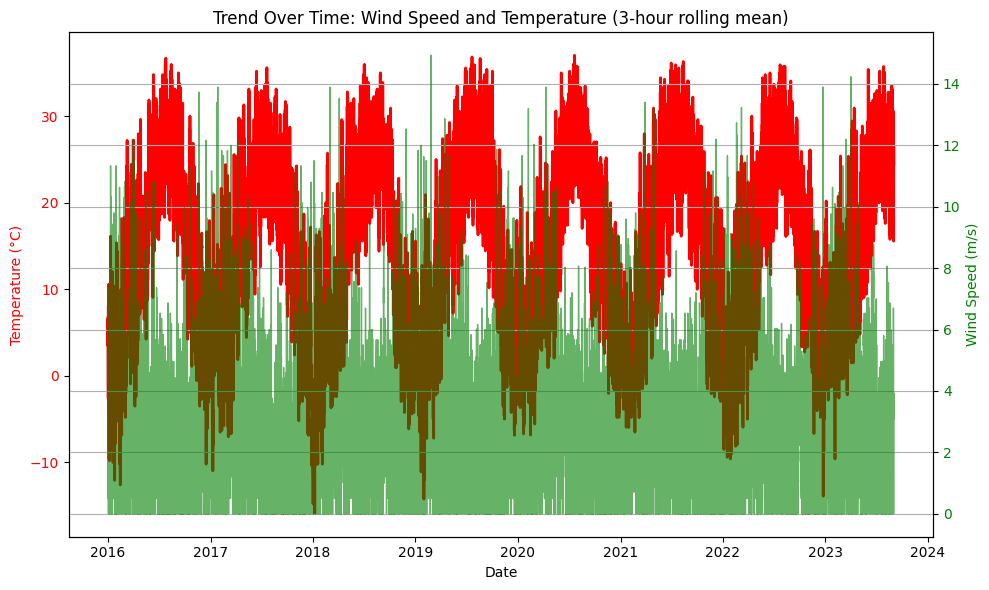

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure your date column is in datetime format
wdf['date'] = pd.to_datetime(wdf['date'])

# Set the date column as the index for better time series handling
wdf.set_index('date', inplace=True)

# Calculate the rolling mean (e.g., 3-hour window) to smooth the data
wdf['WND_speed_rolling'] = wdf['wnd_speed'].rolling(window=3).mean()
wdf['TMP_meas_rolling'] = wdf['tmp_meas'].rolling(window=3).mean()

# Create a figure and axis for the first y-axis (temperature)
fig, ax1 = plt.subplots(figsize=(10,6))

# Plot Temperature on ax1
ax1.plot(wdf.index, wdf['TMP_meas_rolling'], color='red', label='Temperature (Rolling Mean)', linewidth=2)
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (°C)', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Create a second y-axis for Wind Speed
ax2 = ax1.twinx()
ax2.plot(wdf.index, wdf['WND_speed_rolling'], color='green', label='Wind Speed (Rolling Mean)', linewidth=1, alpha=0.6)
ax2.set_ylabel('Wind Speed (m/s)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add title
plt.title('Trend Over Time: Wind Speed and Temperature (3-hour rolling mean)')
plt.grid(True)

# Adjust layout to prevent overlap
fig.tight_layout()

# Show the plot
plt.show()


The temperature data shows strong seasonal variations, with higher temperatures observed during the summer months and lower temperatures during the winter.While there are some year-to-year fluctuations, there doesn't seem to be a significant overall upward or downward trend in temperature over the entire period. Also, Wind speed also exhibits seasonal patterns, with potentially higher wind speeds during certain seasons or periods and similar to temperature, there is no clear, consistent upward or downward trend in wind speed over the entire time period.


# Question 2 -- Data preparation (75 pts)

This problem uses the weather dataset from previous problem sets.  Prepare a dataset to predict the observed temperature from the following predictors:

* The non-temperature fields from the observation
* The temperature recorded in the prior observation

Beginning with the weather dataset:

a. Replace missing values in the dataset with reasonable non-missing values.  Justify your strategy.

In [ ]:
wdf.isnull().sum()

,0
wnd_speed,13
tmp_meas,2
precip,110
precip_intensity,0
cloudcover,36
tstorm,0
winter,0
mist,0
fog,0
WND_speed_rolling,41


As per the observation we have lots of missing values in precip, wind speed and cloud cover columns

In [ ]:
#replacing non binary values with forward fill
#not using mean due to seasonal variations
wdf['wnd_speed'] = wdf['wnd_speed'].fillna(method='ffill').fillna(method='bfill')
wdf['tmp_meas'] = wdf['tmp_meas'].fillna(method='ffill').fillna(method='bfill')

wdf['cloudcover'] = wdf['cloudcover'].fillna(method='ffill').fillna(method='bfill')

#binary values(precipitation) - assuming no precipitation
wdf['precip'] = wdf['precip'].fillna(0)

print(wdf.isnull().sum())

wnd_speed             0
tmp_meas              0
precip                0
precip_intensity      0
cloudcover            0
tstorm                0
winter                0
mist                  0
fog                   0
WND_speed_rolling    41
TMP_meas_rolling      8
dtype: int64


<ipython-input-157-bc329e19f059>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  wdf['wnd_speed'] = wdf['wnd_speed'].fillna(method='ffill').fillna(method='bfill')
<ipython-input-157-bc329e19f059>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  wdf['tmp_meas'] = wdf['tmp_meas'].fillna(method='ffill').fillna(method='bfill')
<ipython-input-157-bc329e19f059>:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  wdf['cloudcover'] = wdf['cloudcover'].fillna(method='ffill').fillna(method='bfill')


In general, for
1. WIND SPEED:  We can replace the missing values by the mean values but instead replacing them with forward and backward fill help us to add the nearest values. This is a good approach since wind speed can have seasonal variations, and forward/backward fill ensures that the missing values are filled with nearby data, which captures the temporal trend.

2. Temperature: Similary as wind speed, forward/backward filling temperature values ensures a smooth time series without artificially introducing a static mean. This is a reasonable approach given the problem of predicting temperature, where seasonal trends are important.

3. Cloud cover: same as wind speed and temperature, replacing the null values with nearest values is best way for seasonal trends

4. Precipitation:These are binary values so by assuming no precipitation (i.e., replacing missing values with 0), this is a sensible approach, as binary precipitation typically indicates whether rain occurred or not, and missing data likely implies no precipitation.

b. Add the temperature from the prior reading as a new feature.  That is, for each observation at time $t_k$, $k>0$, the new feature should have the value of the temperature reading at time $t_{k-1}$.  For the first observation ($k=0$), the value should be missing because the prior temperature is unknown.

In [ ]:
wdf.reset_index( inplace=True)
wdf

,date,wnd_speed,tmp_meas,precip,precip_intensity,cloudcover,tstorm,winter,mist,fog,WND_speed_rolling,TMP_meas_rolling
0,2015-12-31 19:54:00-05:00,1.5,7.2,0.0,0,4.0,0,0,0,0,NaN,NaN
1,2015-12-31 20:54:00-05:00,3.1,6.1,0.0,0,4.0,0,0,0,0,NaN,NaN
2,2015-12-31 21:54:00-05:00,2.1,6.7,0.0,0,4.0,0,0,0,0,2.233333,6.666667
3,2015-12-31 22:54:00-05:00,2.6,6.1,0.0,0,4.0,0,0,0,0,2.600000,6.300000
4,2015-12-31 23:54:00-05:00,2.1,5.6,0.0,0,4.0,0,0,0,0,2.266667,6.133333
...,...,...,...,...,...,...,...,...,...,...,...,...
67198,2023-09-01 15:54:00-04:00,1.5,26.7,0.0,0,1.0,0,0,0,0,2.233333,26.133333
67199,2023-09-01 16:54:00-04:00,4.6,26.7,0.0,0,1.0,0,0,0,0,2.733333,26.500000
67200,2023-09-01 17:54:00-04:00,3.6,26.1,0.0,0,1.0,0,0,0,0,3.233333,26.500000
67201,2023-09-01 18:54:00-04:00,3.6,24.4,0.0,0,1.0,0,0,0,0,3.933333,25.733333


In [ ]:
# Addding new column for the temperature from the prior reading
#Shifting temp_meas column by tk+1 where k>0
wdf['tmp_meas_new'] = wdf['tmp_meas'].shift(1)
wdf[['tmp_meas', 'tmp_meas_new']]

,tmp_meas,tmp_meas_new
0,7.2,NaN
1,6.1,7.2
2,6.7,6.1
3,6.1,6.7
4,5.6,6.1
...,...,...
67198,26.7,26.1
67199,26.7,26.7
67200,26.1,26.7
67201,24.4,26.1


The first row (k=0) will have a NaN in the new_temp column since there is no prior reading for the very first observation.

c. Because the observed temperature is the target variable, it cannot be a feature.  Remove the observed temperature reading from the data frame, and save the values into a new array called $\mathbf{y}$

In [ ]:
y = wdf['tmp_meas'].values
wdf = wdf.drop('tmp_meas', axis=1)
print(wdf.head())

                       date  wnd_speed  precip  precip_intensity  cloudcover  \
0 2015-12-31 19:54:00-05:00        1.5     0.0                 0         4.0   
1 2015-12-31 20:54:00-05:00        3.1     0.0                 0         4.0   
2 2015-12-31 21:54:00-05:00        2.1     0.0                 0         4.0   
3 2015-12-31 22:54:00-05:00        2.6     0.0                 0         4.0   
4 2015-12-31 23:54:00-05:00        2.1     0.0                 0         4.0   

   tstorm  winter  mist  fog  WND_speed_rolling  TMP_meas_rolling  \
0       0       0     0    0                NaN               NaN   
1       0       0     0    0                NaN               NaN   
2       0       0     0    0           2.233333          6.666667   
3       0       0     0    0           2.600000          6.300000   
4       0       0     0    0           2.266667          6.133333   

   tmp_meas_new  
0           NaN  
1           7.2  
2           6.1  
3           6.7  
4           6.

In [ ]:
print(y[:5])

[7.2 6.1 6.7 6.1 5.6]


y will hold the temperature values (which you'll use as the target variable for prediction) and wdf will be the updated dataframe with all other features (excluding the temperature).

d. Remove the non-numeric date field as well as the first observation (which does not have a prior temperature reading).


In [ ]:
wdf.drop('date', axis=1, inplace=True)
wdf = wdf.iloc[1:, :]
print(wdf.head())

   wnd_speed  precip  precip_intensity  cloudcover  tstorm  winter  mist  fog  \
1        3.1     0.0                 0         4.0       0       0     0    0   
2        2.1     0.0                 0         4.0       0       0     0    0   
3        2.6     0.0                 0         4.0       0       0     0    0   
4        2.1     0.0                 0         4.0       0       0     0    0   
5        2.1     0.0                 0         4.0       0       0     0    0   

   WND_speed_rolling  TMP_meas_rolling  tmp_meas_new  
1                NaN               NaN           7.2  
2           2.233333          6.666667           6.1  
3           2.600000          6.300000           6.7  
4           2.266667          6.133333           6.1  
5           2.266667          5.566667           5.6  


e. Construct and apply a `ColumnTransformer` that inputs the dataset into a matrix that is suitable for machine learning.  This output matrix ($\mathbf{X}$) will have the following properties:

* All matrix elements are numeric and at approximately the same scale
* It does not include the target variable (observation temperature)
* There are no missing values

For each imputer and scaler that you use, provide your rationale.


In [ ]:
wdf.describe()

,wnd_speed,precip,precip_intensity,cloudcover,tstorm,winter,mist,fog,WND_speed_rolling,TMP_meas_rolling,tmp_meas_new
count,67202.000000,67202.000000,67202.000000,67202.000000,67202.000000,67202.000000,67202.000000,67202.000000,67162.000000,67195.000000,67202.000000
mean,2.972071,0.135807,0.097110,2.533288,0.005402,0.008824,0.089581,0.006339,2.971953,14.548337,14.548054
std,2.297258,1.042556,0.348896,1.288932,0.073298,0.093522,0.285582,0.079366,2.121297,10.028289,10.071488
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.933333,-16.100000
25%,1.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.400000,6.500000,6.700000
50%,2.600000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.600000,15.000000,15.000000
75%,4.100000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,4.100000,22.933333,22.800000
max,19.000000,78.700000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,14.933333,37.033333,37.800000


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, RobustScaler
from sklearn.pipeline import Pipeline
import pandas as pd
from sklearn.impute import SimpleImputer

# No transformation needed for binary columns
#missing values were handled previously so using 'passthrough'

# Create the column transformer for scaling

preprocessor = ColumnTransformer(
    transformers=[
        ("wnd_speed_scaler", StandardScaler(), ["wnd_speed"]),  # wnd_speed is continuous
        ("precip_scaler", MaxAbsScaler(), ["precip", "precip_intensity"]),  # precip-related columns
        ("cloudcover_scaler", RobustScaler(), ["cloudcover"]),  # Categorical-like values
    ],
    remainder='passthrough'  # Binary columns pass through unchanged
)

# Apply the preprocessing transformations to the dataset
X = preprocessor.fit_transform(wdf)

# Convert the transformed data back into a dataframe
scaled_df = pd.DataFrame(X, columns=wdf.columns)

# Display summary statistics for the scaled dataframe
print(scaled_df.describe())

          wnd_speed        precip  precip_intensity    cloudcover  \
count  6.720200e+04  67202.000000      67202.000000  67202.000000   
mean  -1.556381e-16      0.001726          0.032370     -0.155571   
std    1.000007e+00      0.013247          0.116299      0.429644   
min   -1.293757e+00      0.000000          0.000000     -1.000000   
25%   -6.407995e-01      0.000000          0.000000     -0.666667   
50%   -1.619642e-01      0.000000          0.000000      0.000000   
75%    4.909930e-01      0.000000          0.000000      0.333333   
max    6.977034e+00      1.000000          1.000000      0.666667   

             tstorm        winter          mist           fog  \
count  67202.000000  67202.000000  67202.000000  67202.000000   
mean       0.005402      0.008824      0.089581      0.006339   
std        0.073298      0.093522      0.285582      0.079366   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      

As we have tstrom, winter, mist, fog in the range of 0,1 , its not necessary to pass them to the transformers for scaling

Rationale used:
1.  Apply StandardScaler to 'wind_speed' (continuous variable, centered and scaled)

2. Apply MaxAbsScaler to 'precipitation' and 'precip_intensity' (for sparse data, keeping zero entries intact)

3. Apply RobustScaler to 'cloud_cover' (handles outliers well by using median and IQR scaling)




f. Show the first few rows of the resulting matrices $\mathbf{X}$ and $\mathbf{y}$.  


In [ ]:
print(X[0:10])

[[ 0.05568821  0.          0.          0.33333333  0.          0.
   0.          0.                 nan         nan  7.2       ]
 [-0.37961659  0.          0.          0.33333333  0.          0.
   0.          0.          2.23333333  6.66666667  6.1       ]
 [-0.16196419  0.          0.          0.33333333  0.          0.
   0.          0.          2.6         6.3         6.7       ]
 [-0.37961659  0.          0.          0.33333333  0.          0.
   0.          0.          2.26666667  6.13333333  6.1       ]
 [-0.37961659  0.          0.          0.33333333  0.          0.
   0.          0.          2.26666667  5.56666667  5.6       ]
 [-1.29375666  0.          0.          0.          0.          0.
   0.          0.          1.4         5.          5.        ]
 [-0.64079946  0.          0.          0.33333333  0.          0.
   0.          0.          1.2         4.43333333  4.4       ]
 [-1.29375666  0.          0.          0.33333333  0.          0.
   0.          0.          0.5 

In [ ]:
print(y[0:10])

[7.2 6.1 6.7 6.1 5.6 5.  4.4 3.9 3.3 3.3]
